# Upx Academy - Data Science Foundations

## Final Project - Airlines
        Question 1
        Approach
        Findings and Visualizations

## Team Info

- Shivakumar Konar (United Kingdom)

- Carl Bylin (Colombia)

- Akhil V (United States)

## Domain & Topic of Project

**Domain:** Airlines
**Topic:** Analyze NYC-Flight data

The dataset contains information about all flights that departed from airports in NYC like JFK, LGA and EWR in 2013. It is a total of 336.776 flights.


## Introduction

The **U.S. Department of Transportation’s Bureau of Transportation Statistics (BTS)** reported in March of 2017 that U.S. airlines carried an **all-time high** number of passengers in 2016 – 823.0 million systemwide, 719.0 million domestic and 103.9 million international – surpassing the previous highs reached in 2015. 

The Federal Aviation Administration has to ensure that the airports are in capacity of operating with the growing number of air traffic. For this reason they are planning to invest in the infrastructure of the airports. Still, resources are limited and for that reason **a team of data scientists has been hired by the FAA to decide which airports to invest in and why to maximize the impact of the investment**.

Source: https://www.rita.dot.gov/bts/press_releases/bts013_17

## Data Description

The dataset has a total of 336.776 rows (flights) and 19 columns (features) which are described here:

| Feature | Description |
|---------|-------------|
| year | 2013 |
| month | 1-12 |
| day | Day of the month (1-31) |
| dep_time | Departure times, local timezone |
| sched_dep_time | Scheduled departure time |
| dep_delay | Departure delay, in minutes. Negative times represent early departures |
| arr_time | Arrival times, local timezone |
| sched_arr_time | Scheduled arrival time |
| arr_delay | Arrival delay, in minutes. Negative times represent early arrivals |
| carrier | Two-letter carrier abbreviation |
| flight | Flight number |
| tailnum | Plane tail number |
| origin, dest | Airport codes for origin and destination |
| air_time | Amount of time spent in the air, in minutes |
| distance | Distance flown, in miles |
| hour, minute | Time of departure broken into hour and minutes |
| time_hour | Tiemstamp |

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd

In [122]:
data = pd.read_csv('flight_data.csv')
pd.read_
data.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00


In [123]:
print('The dataset has {} rows and {} columns'.format(data.shape[0], data.shape[1]))

The dataset has 336776 rows and 19 columns


## Business Questions

### Question 1: Is the data relevant for the problem?

**Approach:** 

We will first take a look at the data and evaluate if the features are relevant and enough to tackle the main objective of this project. This means looking closer at the data to decide if it can help us answer the proposed problem and if any preprocessing is needed in order to analyze the data.

Looking back at the objective, the Federal Aviation Administration has to ensure that the airports are in capacity of operating with the growing number of air traffic and thus wants to decide which airports to invest in and why to maximize the impact of their resources. Delays in flights are a natural consequence of operational problems in airports. For this reason, it is useful to take a closer look at the relevant variables:

In [124]:
data[['dep_delay', 'arr_delay', 'air_time', 'distance']].describe()

,dep_delay,arr_delay,air_time,distance
count,328521.000000,327346.000000,327346.000000,336776.000000
mean,12.639070,6.895377,150.686460,1039.912604
std,40.210061,44.633292,93.688305,733.233033
min,-43.000000,-86.000000,20.000000,17.000000
25%,-5.000000,-17.000000,82.000000,502.000000
50%,-2.000000,-5.000000,129.000000,872.000000
75%,11.000000,14.000000,192.000000,1389.000000
max,1301.000000,1272.000000,695.000000,4983.000000


The chosen variables above were 'dep_delay', 'arr_delay', 'air_time' and 'distance'. The first three are measured in minutes and the distance flown is measured in miles.

The mean departure delay is almost 13 minutes and the mean arrival delay is almost 7 minutes. The first thing that grabs our attention is the maximum delay times: 1301 minutes (almost 22 hours) for departures and 1272 minutes (just above 21 hours) for arrivals. This indicates that the dataset probably has a few outliers that might affect the results of our analysis.

To understand this better we can use boxplots of the the delay times, separating them by months:

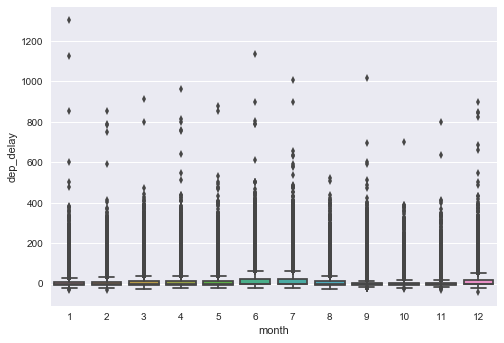

In [125]:
sns.boxplot(x='month', y='dep_delay', data=data)

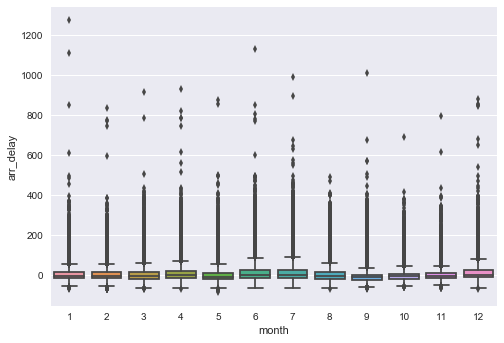

In [126]:
sns.boxplot(x='month', y='arr_delay', data=data)

Outliers are observations that are distant from all the other observations and can often cause problems during statistical analysis. As seen above, the departure delay median is at -2 minutes (2 minutes early) while the mean is almost 13 minutes after the scheduled depature time. This difference is caused by very large outliers. These can be due to errors during measurement or exceptional events. We want to see underlying trends and not waste resources solving a problem that might happen once every 10 years. 

For the reasons above, we will eliminate the outliers using the Interquartile Range eliminating the values that are under or above 1.5 * IQR:

In [147]:
dep_IQR = data['dep_delay'].quantile(0.75) - data['dep_delay'].quantile(0.25)
arr_IQR = data['arr_delay'].quantile(0.75) - data['arr_delay'].quantile(0.25)

print('Departure Interquartile Range:', dep_IQR)
print('Arrival Interquartile Range:', arr_IQR)

Departure Interquartile Range: 16.0
Arrival Interquartile Range: 31.0


In [156]:
dep_mean = data['dep_delay'].mean()
dep_min = dep_mean - 1.5 * dep_mean
dep_max = dep_mean + 1.5 * dep_mean
arr_mean = data['arr_delay'].mean()
arr_min = arr_mean - 1.5 * arr_mean
arr_max = arr_mean + 1.5 * arr_mean

no_outlier_flights = data[((data['dep_delay'] > dep_min) & (data['dep_delay'] < dep_max)) &
                          ((data['arr_delay'] > arr_min) & (data['arr_delay'] < arr_max))].copy()

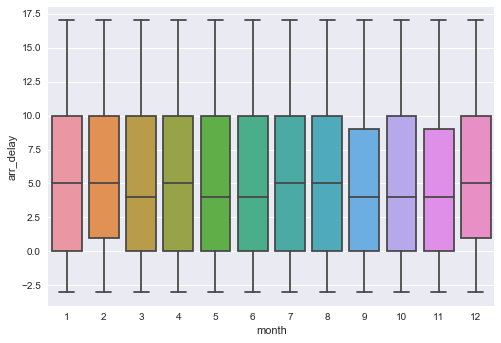

In [157]:
sns.boxplot(x='month', y='arr_delay', data=no_outlier_flights)

In [162]:
strong_delay_flights = data[(data['dep_delay'] > dep_max) | (data['arr_delay'] > arr_max)].copy()

**Findings:** 

We found that the dataset had outliers that had a strong effect on visualizations and statistical analysis. The outliers were eliminated. BUt we also kept a copy of the dataset with just the outliers to evaluate if there is any trend causing the heavy delays. 

In terms of the sufficiency of the data, there are aspects than are relevant to the problem that might not be completely answered by the available data. For that reason, some additional data will be added in the coming questions if needed.

### Question 2: Is there any relationship between departure airport and delays?

**Approach:** 

It is also important to emphasize that the dataset contains flights in the US departing from New York. This helps us to narrow the scope of what we can actually can do with the data (i.e. we can't make conclusions about departure delays in Atlanta).

First of all, we have to evaluate what differences we can find between the departure airports that could have an effect on the delays. After this we use statistical functions to describe the data related to each airport and visualize the results with relevant graphs.

In [4]:
origin_airports = sorted(data.origin.unique())
destination_airports = sorted(data.dest.unique())

In [5]:
origin_airports

['EWR', 'JFK', 'LGA']

The dataset only contains flights leaving from EWR (Newark Liberty International Airport), JFK ( John F. Kennedy International Airport) and LGA (La Guardia Airport).

This dataset has information regarding the distance between the origin and destination of the flight. But it can potentially also be good to know where the airports are located physically. At https://old.datahub.io/dataset/global-airports there is a dataset available which describes several features for airports around the world like city, country, FAA code, latitude, longitude, altitude (in feet), etc.

From this data we will load longitude, latitude and altitude for airports in the US so we can use it with our current dataset.

In [100]:
airports = pd.read_csv('global_airports.csv', index_col='iata_faa')
airports = airports[airports['country'] == 'United States']
airports = airports[['longitude', 'latitude', 'altitude']]

In [90]:
airports.index.name = 'FAA'
airports.head()

,longitude,latitude,altitude
FAA,,,
4I7,-86.813806,39.633556,842
C91,-86.128012,41.992934,748
CDI,-81.577583,39.975028,799
SUE,-87.421556,44.843667,725
0P2,-76.647191,39.794824,1000


In [185]:
airports.loc['JFK']

longitude   -73.778925
latitude     40.639751
altitude     13.000000
Name: JFK, dtype: float64

In [186]:
len(destination_airports)

105

There are 105 destination airports in the data. A way to group the data and is by mapping the airports to the states they are in with the data found in the following link: https://en.wikipedia.org/wiki/List_of_airports_in_the_United_States

In [166]:
us_airports = pd.read_csv('us_airports.csv', index_col='FAA')
us_airports.head()
no_outlier_flights['origin_state'] = no_outlier_flights['origin'].replace(us_airports['State'])
no_outlier_flights['dest_state'] = no_outlier_flights['dest'].replace(us_airports['State'])

At this point we can plot out the flight paths from each departure airport:

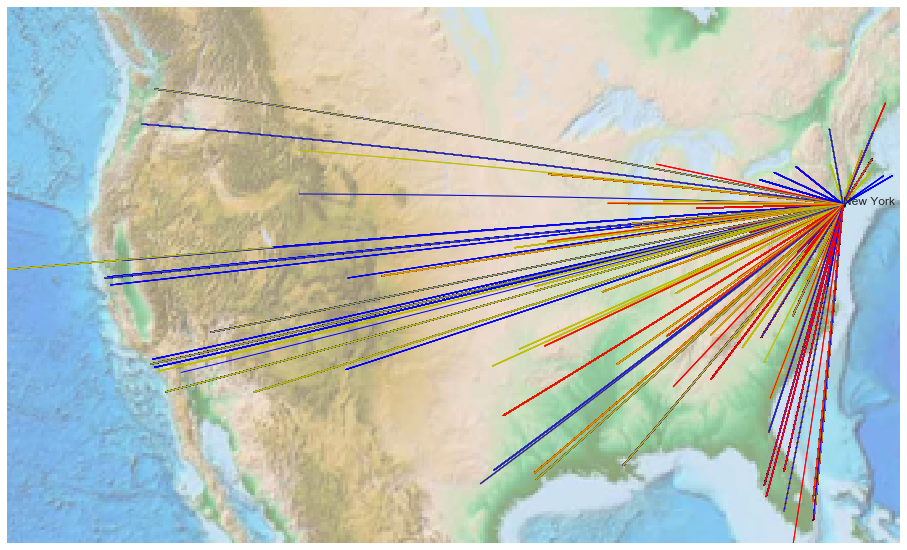

In [194]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.basemap import Basemap
%matplotlib inline

fig = plt.figure(figsize=(16, 16))
m = Basemap(projection='lcc', resolution=None,
            width=5E6, height=3E6, 
            lat_0=40, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

orig_lon, orig_lat = airports.loc['JFK'][0], airports.loc['JFK'][1]

x, y = m(orig_lon, orig_lat)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, 'New York', fontsize=12);

color_code = {'EWR': 'y', 'JFK': 'b', 'LGA': 'r'}
for index, row in no_outlier_flights.sample(n=10000).iterrows():
    try:
        dest_lon, dest_lat, _ = airports.loc[row['dest']]
        m.drawgreatcircle(orig_lon, orig_lat, dest_lon, dest_lat, linewidth=1, color=color_code[row['origin']]);
    except:
        continue        
    
plt.show()

In the map above, flights leaving from LGA are red, departing from JFK are blue and the yellow flights are from EWR. Visually it seems like flights from LGA are shorter while JFK seems to be the departure base for the longer flights.

We can test this by calculating the mean distance from each airport and plotting the results:

In [192]:
no_outlier_flights.groupby(by=['origin'])['distance'].mean()

origin
EWR    1058.026753
JFK    1258.281927
LGA     793.031481
Name: distance, dtype: float64

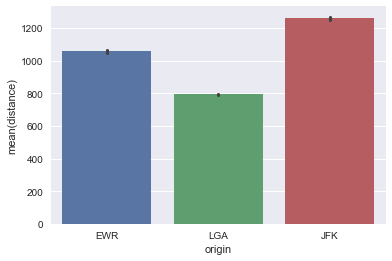

In [193]:
import seaborn as sns

sns.barplot(x='origin', y='distance', data=no_outlier_flights, estimator=np.mean)

The data shows that the flights going out from LGA are on average the shortest while the flights from JFK are on average the longest.

### Question 3: Is there any relationship between arrival airport and delays?

**Approach:** 

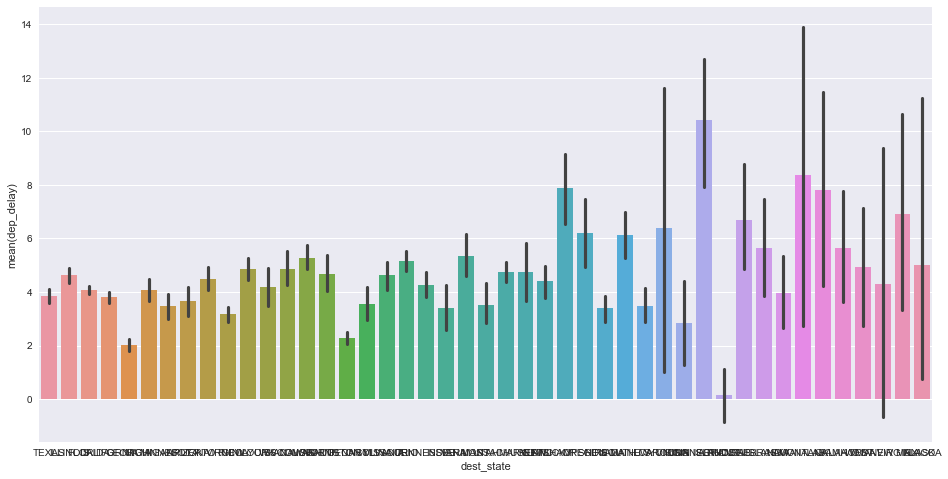

In [180]:
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(x='dest_state', y='dep_delay', data=no_outlier_flights, estimator=np.mean, ax=ax)

In [175]:
no_outlier_flights[no_outlier_flights['dest_state'] == 'GEORGIA']['arr_delay'].mean()

5.404785445916551

### Question 4: Which month and what time of the day is most critical in flight delays?

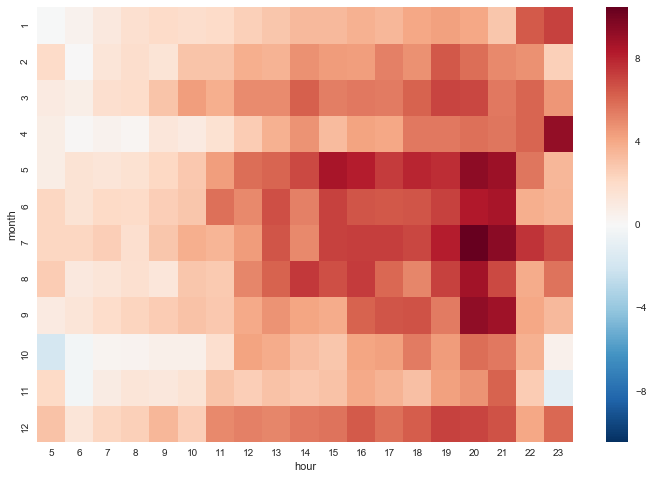

In [160]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(no_outlier_flights.pivot_table('dep_delay', 'month', 'hour'), ax=ax)

Aircraft Registry
Releasable Aircraft Database
https://www.faa.gov/licenses_certificates/aircraft_certification/aircraft_registry/releasable_aircraft_download/

In [ ]:
aircrafts = pd.read_csv('aircrafts_master.txt', sep=',').drop(['TYPE REGISTRANT', 'NAME', 'STREET', 'STREET2', 'CITY', 'STATE','ZIP CODE', 'REGION', 'COUNTY', 
                'COUNTRY', 'CERTIFICATION', 'STATUS CODE', 'MODE S CODE', 'FRACT OWNER', 'OTHER NAMES(1)',
                'OTHER NAMES(2)', 'OTHER NAMES(3)', 'OTHER NAMES(4)', 'OTHER NAMES(5)', 'UNIQUE ID', 'KIT MFR',
                ' KIT MODEL', 'MODE S CODE HEX', 'Unnamed: 34'], axis=1)

In [ ]:
aircrafts['YEAR MFR'] = aircrafts['YEAR MFR'].apply(pd.to_numeric, errors='coerce')

In [ ]:
aircrafts[aircrafts['N-NUMBER'] == '708']